In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("transonic_airfoil_data_set-checkpoint.csv")
df.head()

,No,M,AoA,Cl,Cd,Cp
0,1,0.727928,2.449037,0.740129,0.013330,-0.911550
1,2,0.736393,2.389265,0.736667,0.015423,-1.218775
2,3,0.731969,2.251332,0.709717,0.013156,-1.122496
3,4,0.735015,2.388274,0.736197,0.014977,-1.214580
4,5,0.725872,2.448004,0.737060,0.012857,-0.697603


In [3]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (966, 6)


In [4]:
df = df.drop("No", axis=1)

In [5]:
df.corr()

,M,AoA,Cl,Cd,Cp
M,1.000000,-0.024015,0.164570,0.681272,-0.836605
AoA,-0.024015,1.000000,0.980460,0.673434,-0.270683
Cl,0.164570,0.980460,1.000000,0.778159,-0.421124
Cd,0.681272,0.673434,0.778159,1.000000,-0.799870
Cp,-0.836605,-0.270683,-0.421124,-0.799870,1.000000


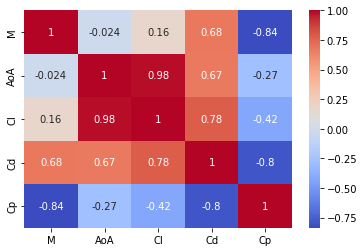

In [6]:
import seaborn as sns
df_heatmap = sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

In [7]:
df.isnull().sum()

M      0
AoA    0
Cl     0
Cd     0
Cp     0
dtype: int64

In [8]:
X = df.iloc[:, 0:2]
Y = df.iloc[:, 2:5]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()

In [13]:
classifier.add(Dense(units=6, activation="relu"))
classifier.add(Dense(units=8, activation="relu"))
classifier.add(Dense(units=8, activation="relu"))
classifier.add(Dense(units=3, activation="linear"))

In [14]:
classifier.compile(optimizer="adam", loss="mse")

In [15]:
model_history = classifier.fit(x_train, y_train, validation_split=0.1, epochs=500)

Epoch 1/500
22/22 [==============================] - 1s 17ms/step - loss: 0.4568 - val_loss: 0.4021
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 0.4078 - val_loss: 0.3568
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 0.3593 - val_loss: 0.3080
Epoch 4/500
22/22 [==============================] - 0s 5ms/step - loss: 0.3072 - val_loss: 0.2575
Epoch 5/500
22/22 [==============================] - 0s 5ms/step - loss: 0.2558 - val_loss: 0.2103
Epoch 6/500
22/22 [==============================] - 0s 9ms/step - loss: 0.2102 - val_loss: 0.1674
Epoch 7/500
22/22 [==============================] - 0s 6ms/step - loss: 0.1566 - val_loss: 0.1100
Epoch 8/500
22/22 [==============================] - 0s 6ms/step - loss: 0.0967 - val_loss: 0.0601
Epoch 9/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0501 - val_loss: 0.0280
Epoch 10/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.0143
Epoch 11

22/22 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 84/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 85/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 86/500
22/22 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 87/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 88/500
22/22 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 89/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 90/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 91/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 92/500
22/22 [==============================] - 0s 5ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 93/500


22/22 [==============================] - 0s 5ms/step - loss: 4.8538e-04 - val_loss: 8.9746e-04
Epoch 163/500
22/22 [==============================] - 0s 5ms/step - loss: 4.7524e-04 - val_loss: 8.8631e-04
Epoch 164/500
22/22 [==============================] - 0s 6ms/step - loss: 4.6905e-04 - val_loss: 8.8171e-04
Epoch 165/500
22/22 [==============================] - 0s 5ms/step - loss: 4.6756e-04 - val_loss: 8.7748e-04
Epoch 166/500
22/22 [==============================] - 0s 6ms/step - loss: 4.6300e-04 - val_loss: 8.6457e-04
Epoch 167/500
22/22 [==============================] - 0s 5ms/step - loss: 4.5624e-04 - val_loss: 8.6253e-04
Epoch 168/500
22/22 [==============================] - 0s 5ms/step - loss: 4.4891e-04 - val_loss: 8.4401e-04
Epoch 169/500
22/22 [==============================] - 0s 5ms/step - loss: 4.4601e-04 - val_loss: 8.4396e-04
Epoch 170/500
22/22 [==============================] - 0s 5ms/step - loss: 4.4072e-04 - val_loss: 8.3370e-04
Epoch 171/500
22/22 [============

22/22 [==============================] - 0s 5ms/step - loss: 2.2966e-04 - val_loss: 4.3796e-04
Epoch 238/500
22/22 [==============================] - 0s 5ms/step - loss: 2.2814e-04 - val_loss: 4.3002e-04
Epoch 239/500
22/22 [==============================] - 0s 4ms/step - loss: 2.2482e-04 - val_loss: 4.2701e-04
Epoch 240/500
22/22 [==============================] - 0s 5ms/step - loss: 2.2392e-04 - val_loss: 4.2920e-04
Epoch 241/500
22/22 [==============================] - 0s 6ms/step - loss: 2.2256e-04 - val_loss: 4.2337e-04
Epoch 242/500
22/22 [==============================] - 0s 5ms/step - loss: 2.1917e-04 - val_loss: 4.2027e-04
Epoch 243/500
22/22 [==============================] - 0s 5ms/step - loss: 2.2041e-04 - val_loss: 4.1075e-04
Epoch 244/500
22/22 [==============================] - 0s 5ms/step - loss: 2.1973e-04 - val_loss: 4.1266e-04
Epoch 245/500
22/22 [==============================] - 0s 6ms/step - loss: 2.1412e-04 - val_loss: 4.1050e-04
Epoch 246/500
22/22 [============

22/22 [==============================] - 0s 5ms/step - loss: 1.4278e-04 - val_loss: 2.4792e-04
Epoch 313/500
22/22 [==============================] - 0s 5ms/step - loss: 1.4106e-04 - val_loss: 2.4493e-04
Epoch 314/500
22/22 [==============================] - 0s 5ms/step - loss: 1.3459e-04 - val_loss: 2.3736e-04
Epoch 315/500
22/22 [==============================] - 0s 5ms/step - loss: 1.3266e-04 - val_loss: 2.4247e-04
Epoch 316/500
22/22 [==============================] - 0s 5ms/step - loss: 1.3465e-04 - val_loss: 2.4599e-04
Epoch 317/500
22/22 [==============================] - 0s 7ms/step - loss: 1.3312e-04 - val_loss: 2.3278e-04
Epoch 318/500
22/22 [==============================] - 0s 5ms/step - loss: 1.3377e-04 - val_loss: 2.3400e-04
Epoch 319/500
22/22 [==============================] - 0s 5ms/step - loss: 1.2989e-04 - val_loss: 2.3701e-04
Epoch 320/500
22/22 [==============================] - 0s 4ms/step - loss: 1.2821e-04 - val_loss: 2.2861e-04
Epoch 321/500
22/22 [============

22/22 [==============================] - 0s 6ms/step - loss: 6.9594e-05 - val_loss: 1.0734e-04
Epoch 388/500
22/22 [==============================] - 0s 5ms/step - loss: 7.0039e-05 - val_loss: 1.0696e-04
Epoch 389/500
22/22 [==============================] - 0s 4ms/step - loss: 6.8565e-05 - val_loss: 1.0744e-04
Epoch 390/500
22/22 [==============================] - 0s 5ms/step - loss: 6.8813e-05 - val_loss: 1.0096e-04
Epoch 391/500
22/22 [==============================] - 0s 4ms/step - loss: 6.8347e-05 - val_loss: 1.0060e-04
Epoch 392/500
22/22 [==============================] - 0s 5ms/step - loss: 6.6353e-05 - val_loss: 9.8336e-05
Epoch 393/500
22/22 [==============================] - 0s 5ms/step - loss: 6.5332e-05 - val_loss: 9.7825e-05
Epoch 394/500
22/22 [==============================] - 0s 5ms/step - loss: 6.5643e-05 - val_loss: 9.8202e-05
Epoch 395/500
22/22 [==============================] - 0s 5ms/step - loss: 6.4382e-05 - val_loss: 9.3171e-05
Epoch 396/500
22/22 [============

22/22 [==============================] - 0s 4ms/step - loss: 3.4500e-05 - val_loss: 3.7902e-05
Epoch 463/500
22/22 [==============================] - 0s 5ms/step - loss: 3.3992e-05 - val_loss: 2.7025e-05
Epoch 464/500
22/22 [==============================] - 0s 5ms/step - loss: 3.4851e-05 - val_loss: 3.2291e-05
Epoch 465/500
22/22 [==============================] - 0s 5ms/step - loss: 3.4992e-05 - val_loss: 3.4995e-05
Epoch 466/500
22/22 [==============================] - 0s 4ms/step - loss: 3.2809e-05 - val_loss: 2.7366e-05
Epoch 467/500
22/22 [==============================] - 0s 5ms/step - loss: 3.3537e-05 - val_loss: 2.6695e-05
Epoch 468/500
22/22 [==============================] - 0s 5ms/step - loss: 3.2549e-05 - val_loss: 2.9643e-05
Epoch 469/500
22/22 [==============================] - 0s 6ms/step - loss: 3.2264e-05 - val_loss: 2.9332e-05
Epoch 470/500
22/22 [==============================] - 0s 5ms/step - loss: 3.1871e-05 - val_loss: 2.4689e-05
Epoch 471/500
22/22 [============

<AxesSubplot:>

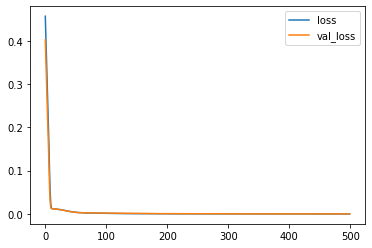

In [16]:
losses = pd.DataFrame(classifier.history.history)
losses[['loss', 'val_loss']].plot()

In [17]:
predictions = classifier.predict(x_test)

In [18]:
predictions

array([[ 0.70080465,  0.01211462, -0.6414076 ],
       [ 0.7270713 ,  0.01555333, -1.2045367 ],
       [ 0.70285594,  0.01209936, -0.6137108 ],
       [ 0.730577  ,  0.01340417, -0.88908696],
       [ 0.6350647 ,  0.0107527 , -0.7331929 ],
       [ 0.702767  ,  0.0127512 , -0.8948811 ],
       [ 0.647429  ,  0.01091265, -0.6745728 ],
       [ 0.7200298 ,  0.01367952, -1.116139  ],
       [ 0.73873353,  0.01470189, -1.1865757 ],
       [ 0.6962655 ,  0.01202711, -0.6505486 ],
       [ 0.7092178 ,  0.01225446, -0.614845  ],
       [ 0.70384604,  0.01228396, -0.68287474],
       [ 0.7035267 ,  0.01320437, -1.0818868 ],
       [ 0.73803777,  0.01398988, -1.0640371 ],
       [ 0.7296748 ,  0.01285681, -0.66304827],
       [ 0.69532657,  0.01206729, -0.67749995],
       [ 0.690548  ,  0.0132326 , -1.1213231 ],
       [ 0.6859901 ,  0.01237854, -0.90751386],
       [ 0.6379552 ,  0.01215595, -1.0871513 ],
       [ 0.70265275,  0.01212942, -0.6287265 ],
       [ 0.73952454,  0.01626703, -1.219

In [19]:
print(predictions.shape)
print(y_test.shape)

(194, 3)
(194, 3)


In [20]:
(np.sum(np.abs(((y_test - predictions)*100)/y_test)))/194

Cl    0.232505
Cd    2.310632
Cp    1.077081
dtype: float64

In [21]:
y_test

,Cl,Cd,Cp
244,0.701956,0.011654,-0.636240
467,0.729844,0.015038,-1.210733
836,0.704604,0.011981,-0.614085
557,0.732964,0.013136,-0.907042
70,0.635680,0.010568,-0.731534
...,...,...,...
960,0.729225,0.012843,-0.777503
576,0.690980,0.012012,-0.712117
767,0.670709,0.011428,-0.623098
33,0.620786,0.010510,-0.718672


In [22]:
from sklearn.metrics import mean_absolute_percentage_error
print("MSE = ", mean_absolute_percentage_error(y_test, predictions))

MSE =  0.012067393377155754


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)

0.9755786394725569


In [27]:
print("Maximum Mach Number: ", np.max(df["M"]))
print("Minimum Mach Number: ", np.min(df["M"]))

Maximum Mach Number:  0.745082
Minimum Mach Number:  0.712442


In [28]:
print("Maximum Angle of Attack: ", np.max(df["AoA"]))
print("Minimum Angle of Attack: ", np.min(df["AoA"]))

Maximum Angle of Attack:  2.987942
Minimum Angle of Attack:  1.67104
